In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


In [2]:
# number of points sampled for training
SAMPLE_SIZE = 5000

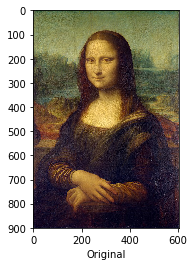

In [3]:
# load image
img = Image.open("Mona_Lisa_by_Leonardo_da_Vinci.jpg")
img = np.asarray(img)
plt.imshow(img)
plt.xlabel("Original")
plt.show()

In [4]:
# process data
data, label = [], []
row = img.shape[0]
col = img.shape[1]
for i in range(SAMPLE_SIZE):
    point = []
    point.append(np.random.randint(row))
    point.append(np.random.randint(col))
    data.append(point)
    label.append(img[point[0],point[1]])
data = np.array(data)
label = np.array(label)

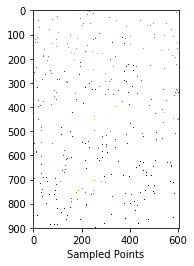

In [5]:

# create a white image
sampledImg = np.zeros([row,col,3], dtype=np.uint8)
sampledImg.fill(255)
for i in range(SAMPLE_SIZE):
    sampledImg[data[i,0]][data[i,1]] = label[i]
plt.imshow(sampledImg)
plt.xlabel("Sampled Points")
plt.show()

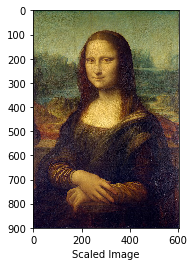

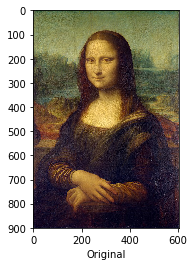

In [6]:
# 2d. Rescale the pixel intensities.
scaledImg = np.array(img, dtype=float)
for i in range(row):
    for j in range(col):
        scaledImg[i,j] = img[i,j] / 255
plt.imshow(scaledImg)
plt.xlabel("Scaled Image")
plt.show()

plt.xlabel("Original")
plt.imshow(img)
plt.show()

scaledLabel = np.array(label, dtype=float)
scaledLabel /= 255

In [ ]:
# 2f. Build the final image.
from sklearn.ensemble import RandomForestRegressor

def run_random_forest(n_tree=1, depth=None, xlabel="Original"):
    rf = RandomForestRegressor(random_state=0, n_estimators=n_tree, max_depth=depth)
    rf.fit(data, label)
    pred = np.zeros([row,col,3])
    for i in range(row):
        for j in range(col):
            point = [i,j]
            point = np.array(point)
            pred[i,j] = rf.predict(point.reshape(1,-1)) / 255
    plt.xlabel(xlabel)
    plt.imshow(pred)
    plt.show()
    return pred

In [ ]:
pred = run_random_forest()

In [7]:
from sklearn.neighbors import KNeighborsClassifier

def run_knn(xlabel="Knn"):
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(data, label)
    pred = np.zeros([row,col,3])
    for i in range(row):
        for j in range(col):
            point = [i,j]
            point = np.array(point)
            pred[i,j] = knn.predict(point.reshape(1,-1)) / 255
    plt.xlabel(xlabel)
    plt.imshow(pred)
    plt.show()
    return pred


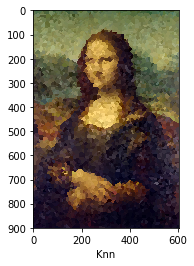

In [8]:
pred = run_knn()